In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import IPython

import torch
import torchaudio

## Extract the pure waveform and other metadata

Sampling rate: 48000
# samples: 232368
# channels 1
duration: 4.841 seconds
torch.Size([1, 232368])


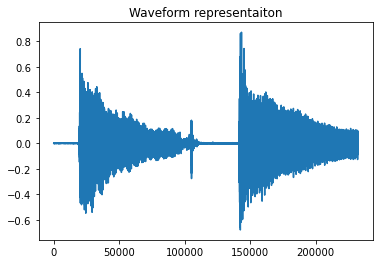

In [2]:
path = "guitar.wav"
signal, sr = torchaudio.load(f"samples/{path}")
print(f'Sampling rate: {sr}\n# samples: {len(signal[0])}\n# channels {signal.shape[0]}\nduration: {len(signal[0])/sr} seconds')
if signal.shape[0] > 1:
    # Defaulting everything to mono
    signal = signal.mean(axis=0).unsqueeze(0)
print(signal.shape)
plt.figure()
plt.plot(signal[0])
plt.title("Waveform representaiton")
IPython.display.Audio(signal, rate = sr)

## Transform and visualize Mel Spectogram

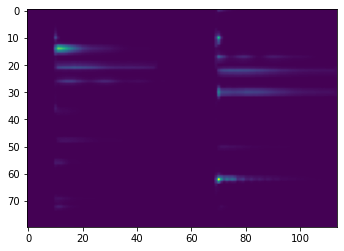

In [7]:
n_fft = 4096
n_mels = 80
f_min = 100
f_max = 1000
power_spec = torchaudio.transforms.SpectralCentroid(sample_rate=sr, n_fft=512)
spec_transform = torchaudio.transforms.MelSpectrogram(sample_rate=sr, n_fft=n_fft, n_mels=n_mels, f_min=f_min, f_max=f_max)
spec = spec_transform(signal)
pspec = power_spec(signal)
plt.imshow(spec[0])
plt.show()

## Transform and visualize MFCC

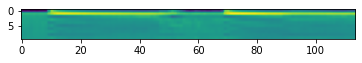

In [8]:
mfcc_transform = torchaudio.transforms.MFCC(sample_rate=sr, n_mfcc=10, melkwargs={'n_fft':n_fft, 'n_mels':n_mels})
mfcc = mfcc_transform(signal)
plt.imshow(mfcc[0])
plt.show()

## Use Griffith-Lim algorithim to invert back to time domain waveform
- This just a lossy estimation

size of original signal: torch.Size([1, 232368])
size of reconstruction: torch.Size([1, 231424])
MSE loss between them: 8.322126814164221e-05


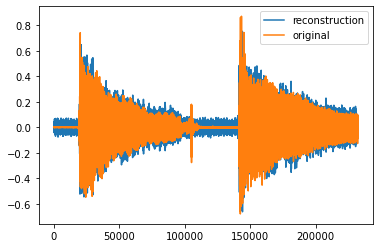

In [9]:
inv_mel = torchaudio.transforms.InverseMelScale(n_stft=(n_fft//2 + 1), sample_rate=sr, n_mels=80, f_min=f_min, f_max=f_max)
power_spec = inv_mel(spec)
griffin_lim = torchaudio.transforms.GriffinLim(n_fft=n_fft)
r1 =  griffin_lim(power_spec)

def test_reconstruction(reconstruction):
    plt.plot(reconstruction[0])
    plt.plot(signal[0])
    plt.legend(['reconstruction', 'original'])
    min_length = min(signal.shape[0], reconstruction.shape[0])
    print(f'size of original signal: {signal.shape}\nsize of reconstruction: {reconstruction.shape}\nMSE loss between them: {torch.nn.MSELoss()(signal[:,0:min_length], reconstruction[:,0:min_length])}')

test_reconstruction(r1)
IPython.display.Audio(r1[0], rate = sr)